# Feature Selection and Data Visualization
This notebook is based on a kernel on kaggle. It uses Breast Cancer Wisconsin (Diagnostic) Data Set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Loading data
Before making anything like feature selection, feature extraction and visualization, first of all we start with basic data analysis. Let's take a look at features of data.

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**There are 3 things that take our attention here**:
- We won't need **id** to make classification.
- We're gonna use **diagnosis** as our class label.
- **Unnamed: 32** is really useless.<br>
<br>
So, my conclusion here is that we remove **id** and **Unnamed: 32** from our dataset.

In [3]:
# Get the target
y = data.diagnosis
# Remove the features that we don't need in our input data
useless_features = ['id','Unnamed: 32','diagnosis']
X = data.drop(useless_features, axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign: 357
Number of Malignant: 212


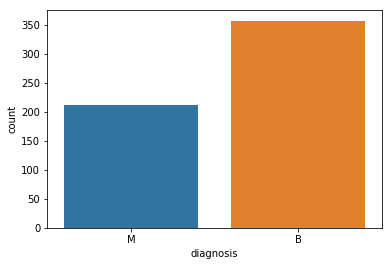

In [4]:
# Take a look the target feature
ax = sns.countplot(y, label='Count')
B,M = y.value_counts()
print('Number of Benign:', B)
print('Number of Malignant:', M)
plt.show()

Okey, we've got features but what do they mean? Actually, we don't need to know meaning of these features. We should know something like variance, standard deviation, etc.

In [5]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


As we see, all of these features have different ranges of value. So, the next thing that we should do is **stadardizing** or **normalizing** the data. To do that, we use **StandardScaler** of **Scikit-learn**.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X.values)
scaled_data = pd.DataFrame(scaled_X, columns=X.columns.values)
scaled_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Visualization
In order to visualize data we are going to use **seaborn**, in particularly, **violin plot**. We're gonna plot into 3 subplots with 10 features in each one.

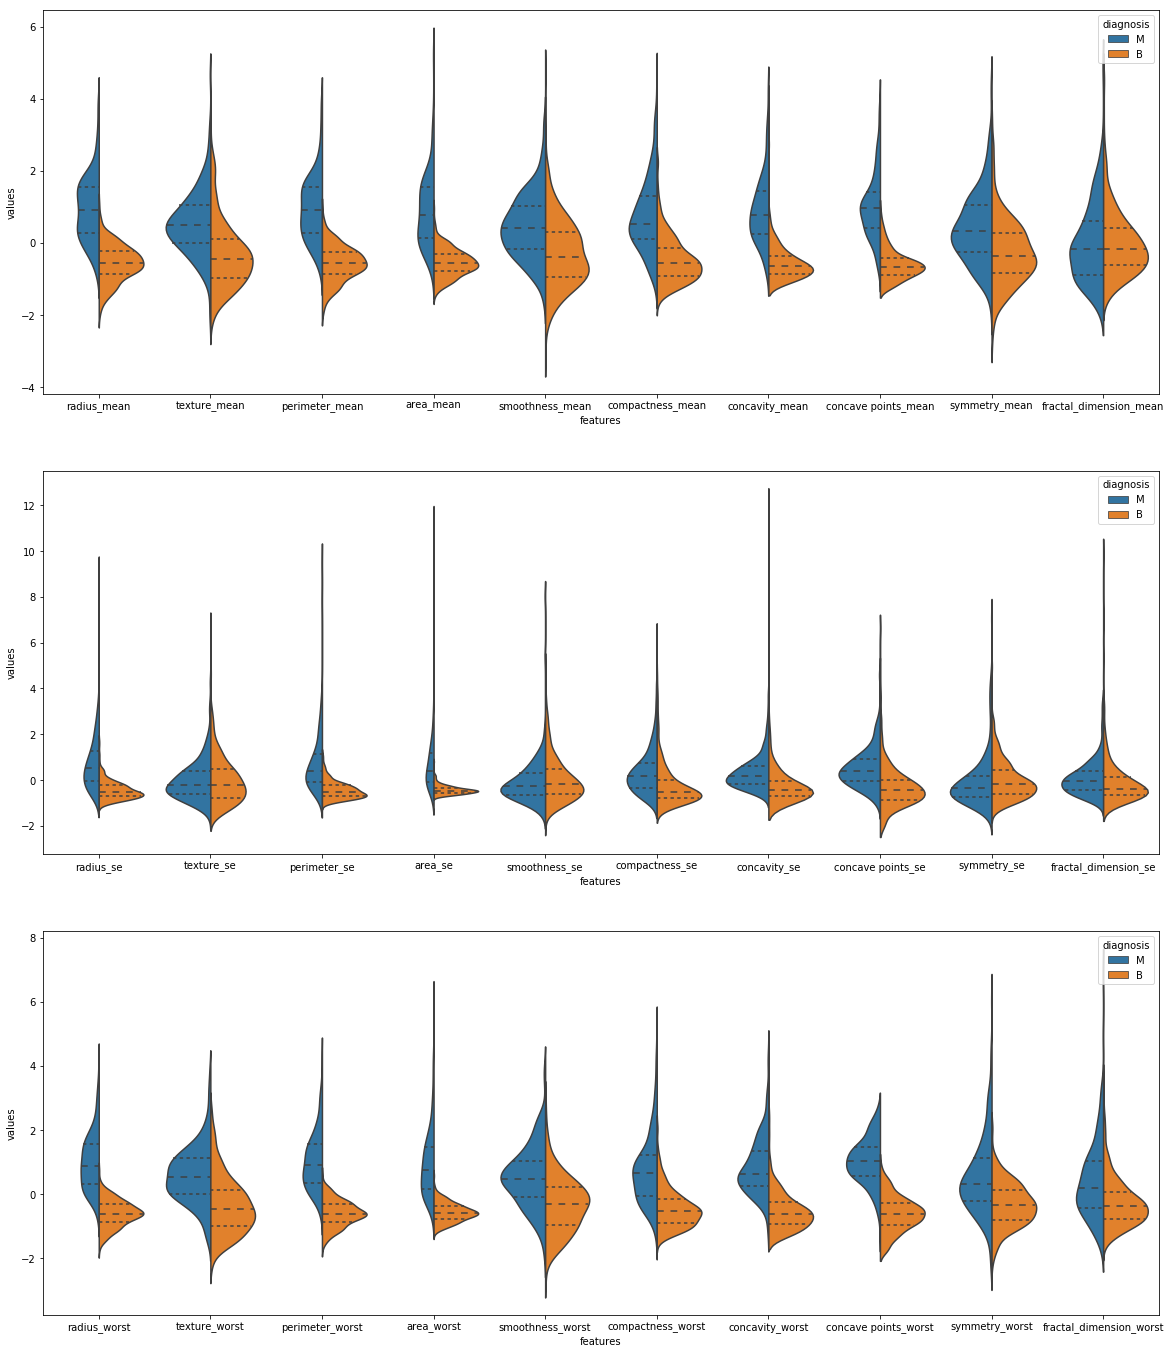

In [7]:
features = X.columns.values
plt.figure(figsize=(20,24))
for i in range(0,3):
    data_tmp = pd.concat([y,scaled_data[features[i*10:(i+1)*10]]], axis=1)
    data_tmp = pd.melt(data_tmp, id_vars='diagnosis', var_name='features', value_name='values')
    plt.subplot(3,1,i+1)
    sns.violinplot(x='features', y='values', hue='diagnosis', data=data_tmp, split=True, inner='quart')
#     plt.xticks(rotation=90)
plt.show()

Let's interpret the plot above together. We take 2 examples to consider **radius_mean** and **texture_se**. Firstly, **radius_mean**, we find that median and standard deviation of the *Benign* and *Malignant* look like separated, so it seems good for classification. Secondly, **texture_se**, the median and standard deviation of the two labels don't like separated, so it doesn't seem good for classification. In brief, This is one of visualized ways to consider what feature is good for classification.<br>
In order to compare two features deeper, we can use **joint plot**. This plot is very useful for consider whether or not two features are correlated. The below plot shows the relationship between **concave point_worst** and **concaveity_worst**. Indeed, they are correlated with Pearson score 0.86.

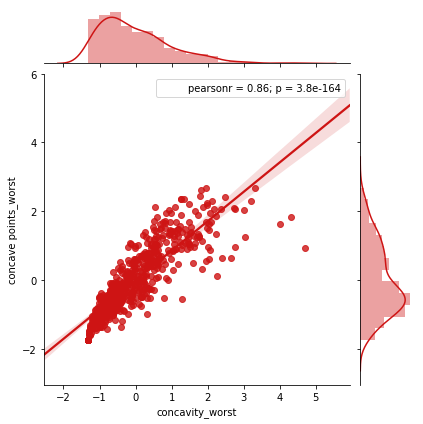

In [8]:
sns.jointplot(scaled_data.loc[:,'concavity_worst'], scaled_data.loc[:,'concave points_worst'], kind="regg", color="#ce1414")
plt.show()

What about three or more features comparision? For this purpose, we can use **pair grid plot**. We will try this with three features **radius_worst**, **perimeter_worst**, and **area_worst**. And we can use this for feature selection.

/Users/ntphuong/anaconda/envs/py3k/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


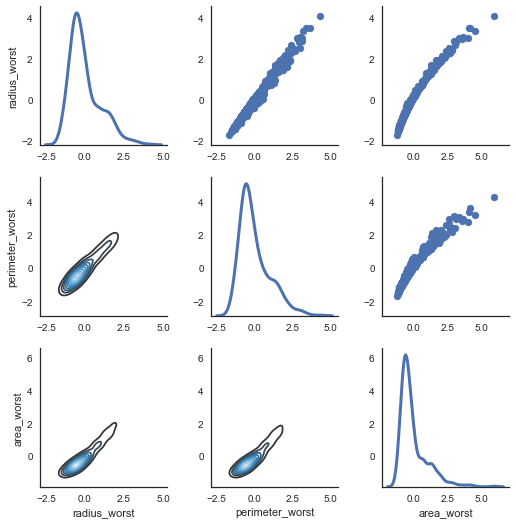

In [9]:
# Prepare data
compared_features = ['radius_worst','perimeter_worst','area_worst']
df = scaled_data[compared_features]
# Plot data
sns.set(style='white')
graph = sns.PairGrid(df, diag_sharey=False)
graph.map_lower(sns.kdeplot, cmap='Blues_d')
graph.map_upper(plt.scatter)
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

Similar to what we did to **violin plot**, we're gonna do the same with **swarm plot**.

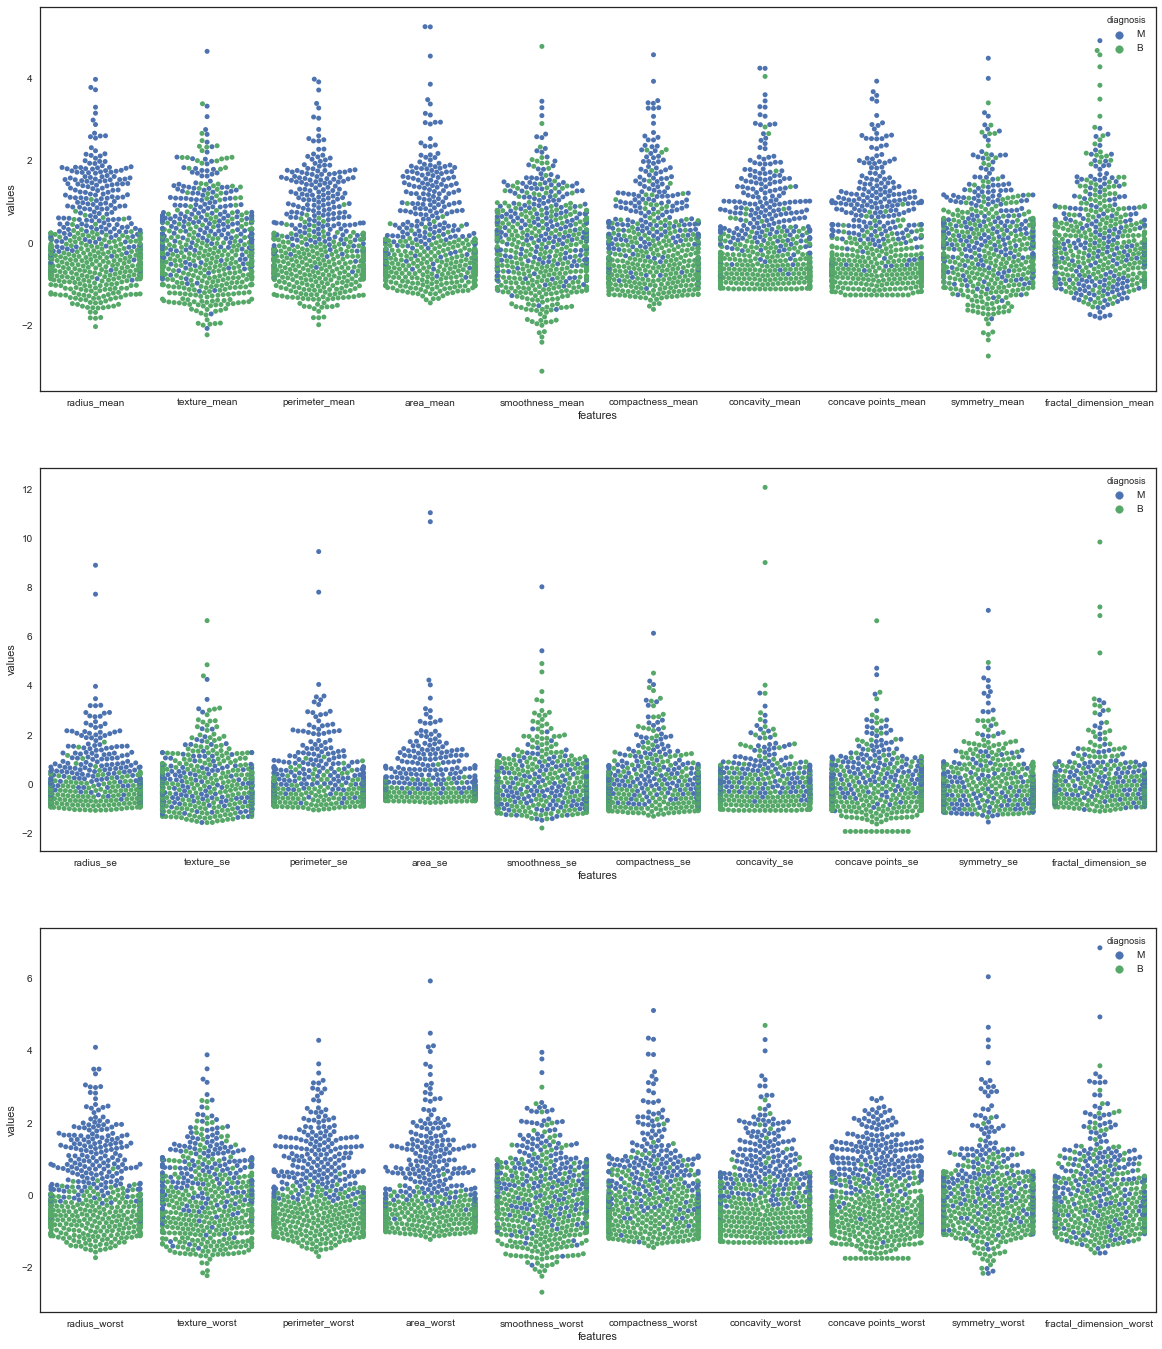

In [10]:
features = X.columns.values
plt.figure(figsize=(20,24))
for i in range(0,3):
    data_tmp = pd.concat([y,scaled_data[features[i*10:(i+1)*10]]], axis=1)
    data_tmp = pd.melt(data_tmp, id_vars='diagnosis', var_name='features', value_name='values')
    plt.subplot(3,1,i+1)
    tic = time.time()
    sns.swarmplot(x='features', y='values', hue='diagnosis', data=data_tmp)
#     plt.xticks(rotation=90)
plt.show()